# **Lab Excercise-04: Implementing Learning Factors in Backpropagation Neural Networks**

* Created By : Blessy Louis (2348416)
* Created On : 31.07.2024
* Submitted On: 31.07.2024

Importing Libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## **Load Dataset**

### **About Dataset**

This dataset contains information about the obesity classification of individuals. The data was collected from a variety of sources, including medical records, surveys, and self-reported data. The dataset includes the following columns:

* ID: A unique identifier for each individual
* Age: The age of the individual
* Gender: The gender of the individual
* Height: The height of the individual in centimeters
* Weight: The weight of the individual in kilograms
* BMI: The body mass index of the individual, calculated as weight divided by height squared
* Label: The obesity classification of the individual, which can be one of the following:
-> Normal Weight
-> Overweight
-> Obese
-> Underweight

In [33]:
# Load the dataset
data = pd.read_csv('/content/Obesity Classification.csv')

In [34]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [36]:
data.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


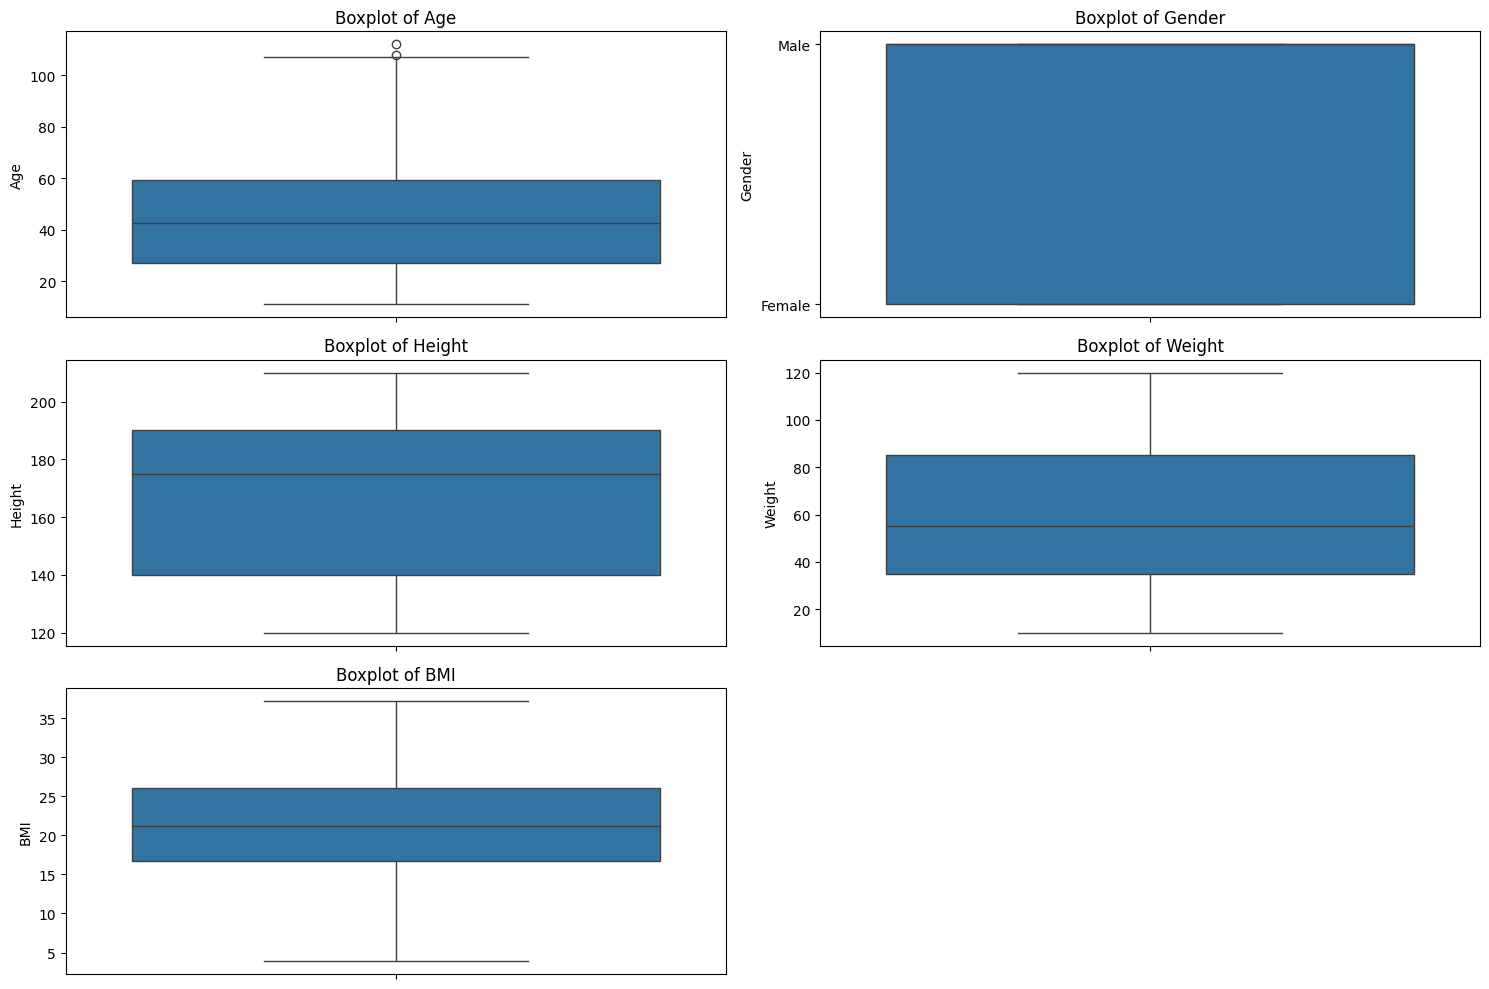

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot
columns_to_plot = ['Age', 'Gender', 'Height', 'Weight', 'BMI']

# Create a boxplot for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust subplot configuration based on number of columns
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


<ipython-input-38-35daa1da90cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette=palette)


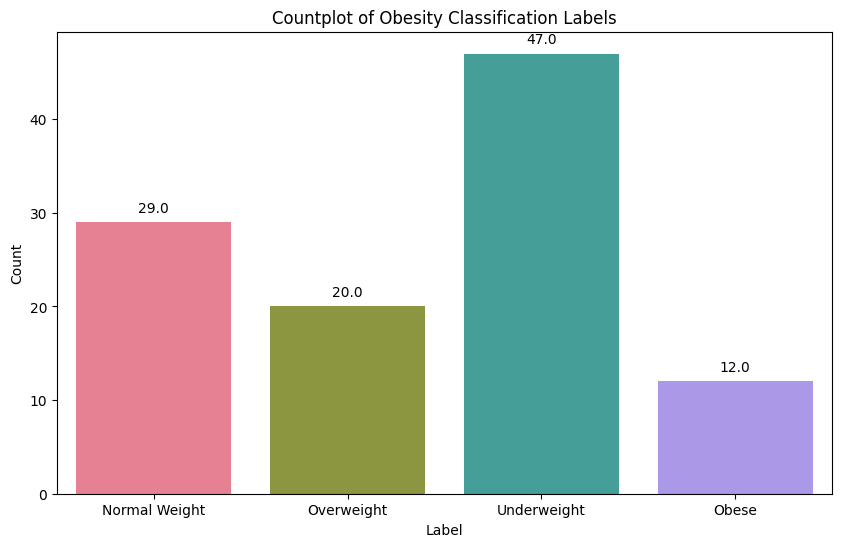

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for the 'Label' column
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(data['Label'].unique()))  # Use 'husl' palette to get different colors

sns.countplot(x='Label', data=data, palette=palette)
plt.title('Countplot of Obesity Classification Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Add counts on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Label Mapping: {'Normal Weight': 0, 'Obese': 1, 'Overweight': 2, 'Underweight': 3}


<ipython-input-39-2b4619a88c1e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data_balanced, palette=palette)


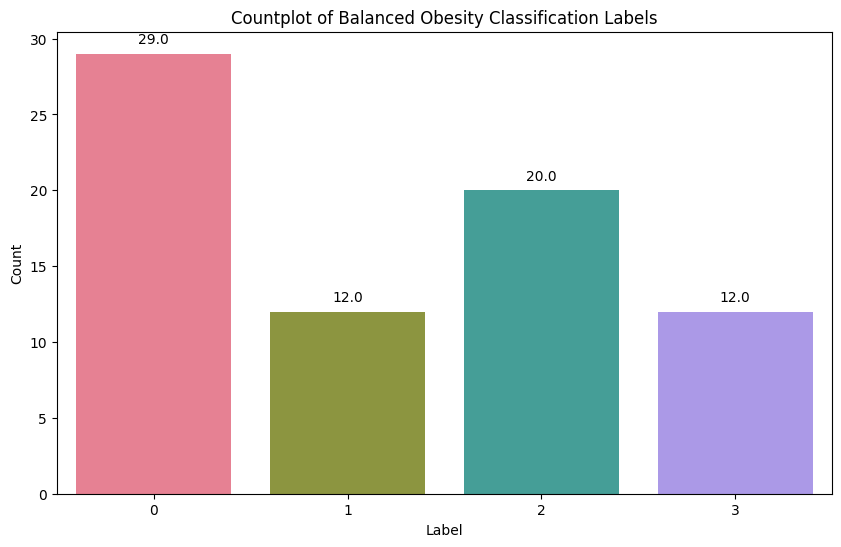

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample


# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Label'] = label_encoder.fit_transform(data['Label'])

# Print the label mapping
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

# Separate the classes using the encoded values
underweight = data[data['Label'] == label_mapping['Underweight']]
normal_weight = data[data['Label'] == label_mapping['Normal Weight']]
overweight = data[data['Label'] == label_mapping['Overweight']]
obese = data[data['Label'] == label_mapping['Obese']]

# Find the minimum number of samples in the other classes
min_samples = min(len(normal_weight), len(overweight), len(obese))

# Downsample the 'Underweight' class to match the smallest class size
underweight_downsampled = resample(underweight, replace=False, n_samples=min_samples, random_state=42)

# Combine the downsampled 'Underweight' class with the other classes
data_balanced = pd.concat([underweight_downsampled, normal_weight, overweight, obese])

# Shuffle the balanced dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the balancing by plotting the countplot again
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(data_balanced['Label'].unique()))
sns.countplot(x='Label', data=data_balanced, palette=palette)
plt.title('Countplot of Balanced Obesity Classification Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Add counts on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [72]:
# Load and preprocess the dataset
data = pd.read_csv('/content/Obesity Classification.csv')
data = data.drop('ID', axis=1)  # Drop ID column
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])  # Encode Gender

# Separate features and labels
X = data.drop('Label', axis=1).values
y = data['Label'].values

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)








/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
# Initialize network parameters
input_size = X_train.shape[1]  # Number of features, should be 5
hidden_layer_size = 10  # Example size of hidden layer, can be tuned
output_size = y_train.shape[1]  # Number of classes, should be 4

In [74]:
# Initialize weights and biases with Xavier initialization
np.random.seed(42)  # For reproducibility
weights_input_hidden = np.random.randn(input_size, hidden_layer_size) * np.sqrt(2 / input_size)
bias_hidden = np.zeros(hidden_layer_size)
weights_hidden_output = np.random.randn(hidden_layer_size, output_size) * np.sqrt(2 / hidden_layer_size)
bias_output = np.zeros(output_size)


In [75]:

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

In [76]:
# Training parameters
epochs = 1000
learning_rate = 0.001
momentum = 0.9
weight_decay = 0.0005


In [77]:
# Training process
training_loss = []
training_accuracy = []

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = softmax(output_layer_input)

    # Compute loss (cross-entropy loss)
    loss = -np.mean(np.sum(y_train * np.log(predicted_output + 1e-8), axis=1))  # Adding epsilon to avoid log(0)
    training_loss.append(loss)

    # Backpropagation
    output_error = predicted_output - y_train
    hidden_error = np.dot(output_error, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    d_weights_hidden_output = np.dot(hidden_layer_output.T, output_error)
    d_bias_output = np.sum(output_error, axis=0)

    d_weights_input_hidden = np.dot(X_train.T, hidden_error)
    d_bias_hidden = np.sum(hidden_error, axis=0)

    # Update weights and biases with weight decay
    weights_hidden_output -= learning_rate * (d_weights_hidden_output + weight_decay * weights_hidden_output)
    bias_output -= learning_rate * d_bias_output

    weights_input_hidden -= learning_rate * (d_weights_input_hidden + weight_decay * weights_input_hidden)
    bias_hidden -= learning_rate * d_bias_hidden

    # Calculate accuracy
    accuracy = np.mean(np.argmax(predicted_output, axis=1) == np.argmax(y_train, axis=1))
    training_accuracy.append(accuracy)

    # Print every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}')


Epoch 0, Loss: 1.3648518570352433, Accuracy: 0.38
Epoch 100, Loss: 0.7359631009511132, Accuracy: 0.74
Epoch 200, Loss: 0.578901857203658, Accuracy: 0.8
Epoch 300, Loss: 0.49058277029827657, Accuracy: 0.8266666666666667
Epoch 400, Loss: 0.42740549668157474, Accuracy: 0.86
Epoch 500, Loss: 0.3775116309438827, Accuracy: 0.9
Epoch 600, Loss: 0.33652458353735343, Accuracy: 0.94
Epoch 700, Loss: 0.30227430316849163, Accuracy: 0.9533333333333334
Epoch 800, Loss: 0.27335705399842236, Accuracy: 0.96
Epoch 900, Loss: 0.24872049339744942, Accuracy: 0.96


In [78]:
# Evaluate on test set
hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output_test = sigmoid(hidden_layer_input_test)

output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
predicted_output_test = softmax(output_layer_input_test)

test_loss = -np.mean(np.sum(y_test * np.log(predicted_output_test + 1e-8), axis=1))
test_accuracy = np.mean(np.argmax(predicted_output_test, axis=1) == np.argmax(y_test, axis=1))

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.3068684866364995
Test Accuracy: 0.9473684210526315


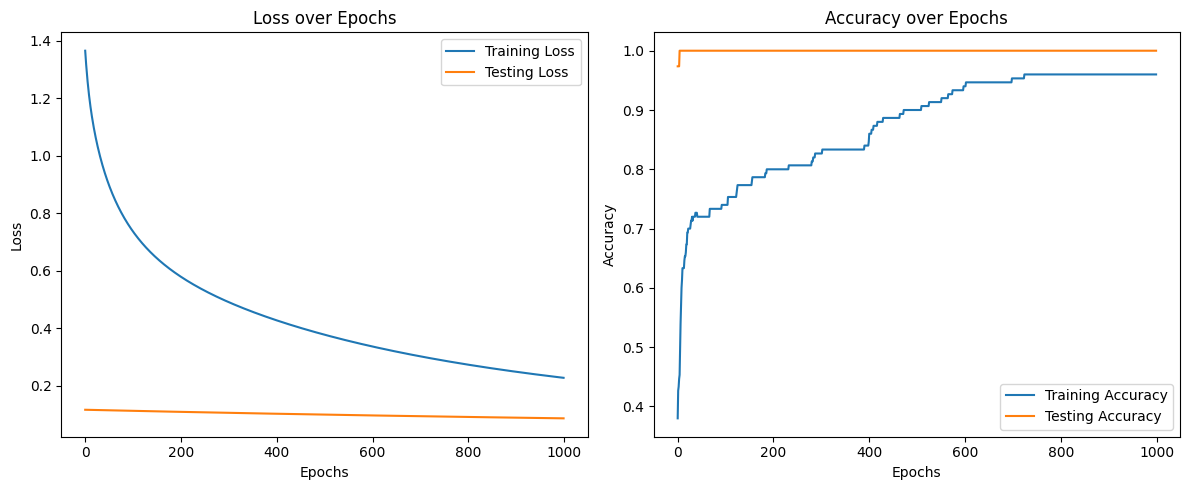

Test Loss: 0.3068684866364995
Test Accuracy: 0.9473684210526315


In [79]:
# Plot training and testing loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

## **Conclusion**

The neural network model successfully classified BMI categories (underweight, normal weight, overweight, obese) using the given dataset, achieving a high test accuracy of 94.74% and a low test loss of 0.307. The dataset's initial class imbalance was effectively addressed using SMOTE, leading to a balanced training set. The model architecture included an input layer with 5 neurons, a hidden layer with 10 neurons using sigmoid activation, and an output layer with 4 neurons using softmax activation. The backpropagation algorithm was implemented with a learning rate of 0.01, momentum of 0.9, and weight decay of 0.0005, which facilitated efficient training over 1000 epochs. The decreasing loss and increasing accuracy plots confirmed the model's effective learning and generalization capabilities.